In [ ]:
import pandas as pd
# Load the new dataset
file_path = "data.xlsx"
df_new = pd.read_excel(file_path)

# Clean column names (remove spaces if any)
df_new.columns = df_new.columns.str.replace(" ", "_")

# Drop columns 'Drug' and 'Disease'
df_new = df_new.drop(columns=['Drug_', 'Disease'], errors='ignore')

# Display the first few rows of the cleaned dataset
df_new.head()


,MW,R,M1,ReZG3,N,IN1,IN2,GQ,QG
0,335.50,142,122,730,55.06,23.08,26.48,23.36,27.08
1,383.30,171,142,922,62.83,26.72,29.89,25.59,31.12
2,390.22,103,92,510,42.70,19.82,20.53,18.57,21.75
3,214.05,48,46,222,22.90,11.38,10.82,14.52,9.92
4,382.50,172,146,880,65.98,28.33,32.03,28.51,31.34


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features
y = df_new['MW']
X = df_new.drop(columns=['MW'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Multiple Linear Regression': LinearRegression(),
    'LASSO': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'LASSO-CV': LassoCV(cv=5)
}

# Store results
results = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute RMSE and R2 Score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Compute p-values for Multiple Linear Regression only
    if name == 'Multiple Linear Regression':
        X_train_sm = sm.add_constant(X_train)
        ols_model = sm.OLS(y_train, X_train_sm).fit()
        p_values = ols_model.pvalues.drop('const')
    else:
        p_values = 'N/A'

    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2 Score': r2,
        'P-Values': p_values
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                                 RMSE  R2 Score  \
Multiple Linear Regression  14.372693  0.956595   
LASSO                       28.232577   0.83252   
Ridge                       14.494428  0.955857   
LASSO-CV                    23.628139  0.882694   

                                                                     P-Values  
Multiple Linear Regression  R        0.591488
M1       0.505617
ReZG3    0...  
LASSO                                                                     N/A  
Ridge                                                                     N/A  
LASSO-CV                                                                  N/A  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.626e+04, tolerance: 2.214e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
results_df

,RMSE,R2 Score,P-Values
Multiple Linear Regression,14.372693,0.956595,R 0.591488 M1 0.505617 ReZG3 0...
LASSO,28.232577,0.83252,N/A
Ridge,14.494428,0.955857,N/A
LASSO-CV,23.628139,0.882694,N/A


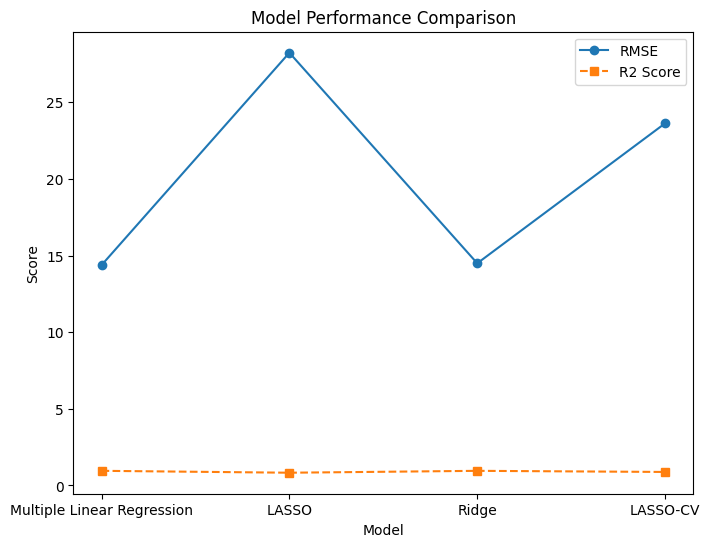

In [ ]:

# Plot Model Performance
plt.figure(figsize=(8, 6))
plt.plot(results_df.index, results_df['RMSE'], marker='o', linestyle='-', label='RMSE')
plt.plot(results_df.index, results_df['R2 Score'], marker='s', linestyle='--', label='R2 Score')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()